63011212019 อาทิตย์ ทวีบท รหัสวิชา 1204317 Sec 1 (20/07/2565)

---



In [19]:
import numpy as np

data = [[5,7,1],[7,2,3],[2,4,6]] #list
x = {1,3,5} #set
y = {1:1, 3:3, 5:5} #dic

mean = np.mean(data, axis=1) #ค่าเฉลี่ย

std = np.std(data[0]) #ส่วนเบี่ยงเบนมาตฐาน

def Eudist(x,y): #คำนวนหาระยะทาง แบบที่ 1 Eudist
  e = np.sqrt(np.sum((np.array(x) - np.array(y))**2, axis=0)) 
  return e

def Manhatton(x,y): #คำนวนหาระยะทาง แบบที่ 2 Manhatton
  m = np.sum(np.abs(np.array(x) - np.array(y)), axis=0)
  return m

print('data = ', data)
print('mean = ', mean) #data เป็น Vector 3 dimension
print('std = ', std)
print('Eudist = ', Eudist(data[0], data[1]))
print('Manhatton = ', Manhatton(data[0], data[1]))

data =  [[5, 7, 1], [7, 2, 3], [2, 4, 6]]
mean =  [4.33333333 4.         4.        ]
std =  2.494438257849294
Eudist =  5.744562646538029
Manhatton =  9


Data Scaling and Normalization

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

In [23]:
ss = StandardScaler()
features, target = load_wine(return_X_y=True)
scaled_data = ss.fit_transform(features)

print('Unscaled Data:\n',features)
print("Scaled Data :\n",scaled_data)

Unscaled Data:
 [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
Scaled Data :
 [[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


In [24]:
from sklearn.preprocessing import Normalizer
import numpy as np

In [25]:
data = np.array([7.0, 2.0, 3.0, 4.0])

n_max = Normalizer(norm='max')
norm_data = n_max.fit_transform(data.reshape(1, -1))
print("Norm Data(max) :\n ",norm_data)

n_l1 = Normalizer(norm='l1')
norm_data = n_l1.fit_transform(data.reshape(1, -1))
print("Norm Data(l1) :\n ",norm_data)

n_l2 = Normalizer(norm='l2')
norm_data = n_l2.fit_transform(data.reshape(1, -1))
print("Norm Data(l2) :\n ",norm_data)

Norm Data(max) :
  [[1.         0.28571429 0.42857143 0.57142857]]
Norm Data(l1) :
  [[0.4375 0.125  0.1875 0.25  ]]
Norm Data(l2) :
  [[0.79259392 0.22645541 0.33968311 0.45291081]]


MinMax Scaler

In [26]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

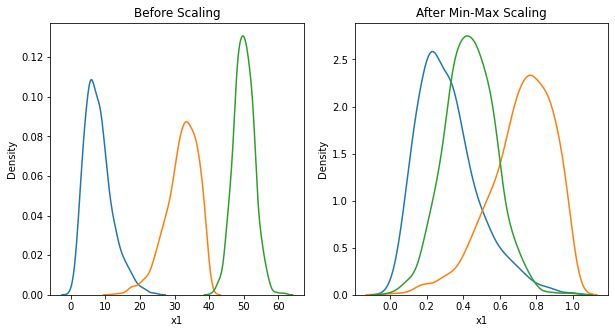

In [27]:
df = pd.DataFrame({
 # positive skew
 'x1': np.random.chisquare(8, 1000),
 # negative skew 
 'x2': np.random.beta(8, 2, 1000) * 40,
 # no skew
 'x3': np.random.normal(50, 3, 1000)
})

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)

plt.show()

Robust Scaler

In [28]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

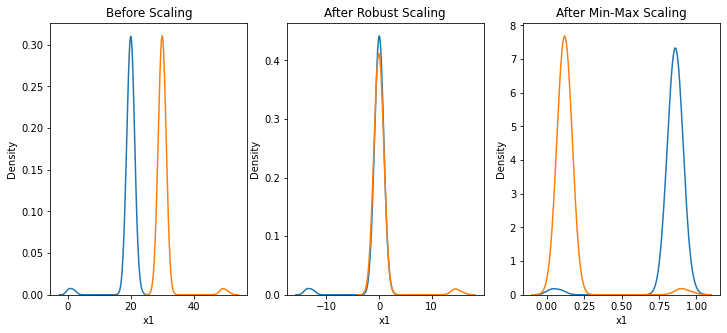

In [29]:
x = pd.DataFrame({
 # Distribution with lower outliers
 'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
 # Distribution with higher outliers
 'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

scaler = RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])

scaler = MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)

ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)

plt.show()

In [ ]:
Normalizer

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

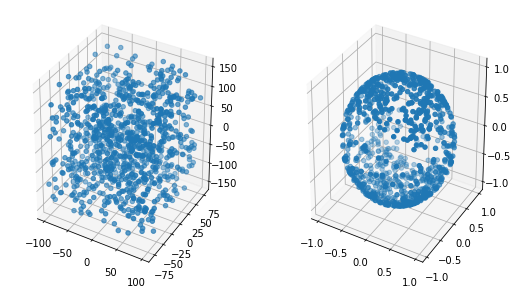

In [31]:
df = pd.DataFrame({
 'x1': np.random.randint(-100, 100, 1000).astype(float),
 'y1': np.random.randint(-80, 80, 1000).astype(float),
 'z1': np.random.randint(-150, 150, 1000).astype(float),
})

scaler = Normalizer()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

fig = plt.figure(figsize=(9, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])

plt.show()